# Using lifelines to fit survival curves

This example uses KM curves, and Nelson-Aalen curves. It shows how we can<br>
use a smoothed estimate of the hazard function to get a smoothed survival<br>
function - similar to [this example in R](https://github.com/nayefahmad/survival-analysis-notes/blob/main/src/2022-02-09_smoothing-the-km-estimate.md)  # noqa

References:<br>
  - https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html  # noqa

In [43]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from lifelines.datasets import load_waltons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
from IPython.core.interactiveshell import InteractiveShell  # noqa

In [45]:
InteractiveShell.ast_node_interactivity = "all"

## Example 1

In [46]:
waltons = load_waltons()
waltons.columns = ["time", "event", "group"]
waltons.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
time,163,NaN,NaN,NaN,49.6135,17.078,6,41,56,61,75
event,163,NaN,NaN,NaN,0.957055,0.203357,0,1,1,1,1
group,163,2,control,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<lifelines.KaplanMeierFitter:"waltons_data", fitted with 163 total observations, 7 right-censored observations>

<AxesSubplot:xlabel='timeline'>

Text(0.5, 1.0, 'KM curve - Waltons data')

c:\Nayef\survival-analysis-notes\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


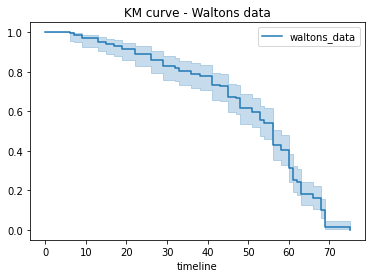

In [47]:
kmf = KaplanMeierFitter(label="waltons_data")
kmf.fit(waltons["time"], waltons["event"])
fig, ax = plt.subplots()
kmf.plot_survival_function(ax=ax)
ax.set_title("KM curve - Waltons data")
fig.show()

## Smoothing the survival curve by using smoothed hazard function

Reference: [github link](https://github.com/nayefahmad/survival-analysis-notes/blob/main/src/2022-02-09_smoothing-the-km-estimate.md) # noqa

This is the `gastricXelox` data in R package `asaur`.

In [48]:
time_months = [
    0.9256198,
    1.8512397,
    1.8512397,
    1.8512397,
    2.0826446,
    2.5454545,
    2.7768595,
    3.0082645,
    3.7024793,
    3.7024793,
    3.9338843,
    3.9338843,
    4.3966942,
    4.8595041,
    5.5537190,
    5.5537190,
    5.7851240,
    6.4793388,
    6.4793388,
    6.9421488,
    8.5619835,
    8.5619835,
    9.7190083,
    9.9504132,
    9.9504132,
    10.6446281,
    11.1074380,
    11.5702479,
    11.8016529,
    12.2644628,
    12.4958678,
    13.1900826,
    13.6528926,
    13.6528926,
    13.8842975,
    14.8099174,
    15.2727273,
    17.5867769,
    18.0495868,
    21.0578512,
    27.5371901,
    27.7685950,
    32.1652893,
    40.7272727,
    43.2727273,
    46.9752066,
    50.2148760,
    58.5454545,
]

In [49]:
delta = [
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
]

KM curve:

<lifelines.KaplanMeierFitter:"gastricXelox data", fitted with 48 total observations, 16 right-censored observations>

<AxesSubplot:xlabel='timeline'>

Text(0.5, 1.0, 'KM estimate of survival function')

c:\Nayef\survival-analysis-notes\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


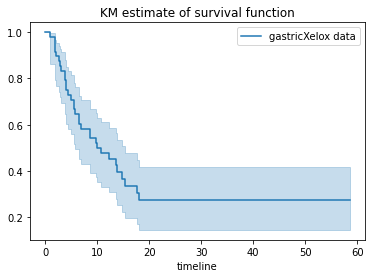

In [50]:
km2 = KaplanMeierFitter(label="gastricXelox data")
km2.fit(time_months, delta)
fig, ax = plt.subplots()
km2.plot_survival_function(ax=ax)
ax.set_title("KM estimate of survival function")
fig.show()

## Nelson-Aalen-based cumulative hazard function and smoothed hazard fn:

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 48 total observations, 16 right-censored observations>

<AxesSubplot:xlabel='timeline'>

Text(0.5, 1.0, 'Estimated cumulative hazard function')

c:\Nayef\survival-analysis-notes\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


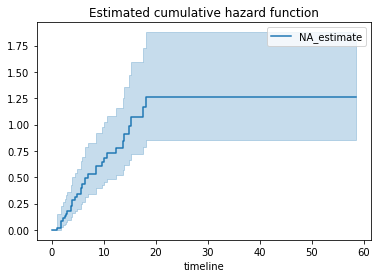

In [51]:
na1 = NelsonAalenFitter()
na1.fit(time_months, delta)
fig, ax = plt.subplots()
na1.plot_cumulative_hazard(ax=ax)
ax.set_title("Estimated cumulative hazard function")
fig.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Estimated hazard function')

c:\Nayef\survival-analysis-notes\.venv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


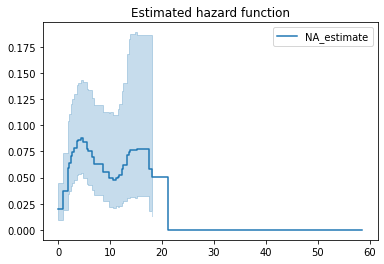

In [52]:
bandwidth = 3
fig, ax = plt.subplots()
na1.plot_hazard(bandwidth=bandwidth, ax=ax)
ax.set_title("Estimated hazard function")
fig.show()

Recover the data underlying the plot using the `smoothed_hazard_()` method

In [53]:
df_smoothed_hazard = (
    na1.smoothed_hazard_(bandwidth=bandwidth)
    .reset_index()
    .rename(
        columns={"index": "time", "differenced-NA_estimate": "hazard_estimate"}
    )  # noqa
)
df_smoothed_hazard.head()
df_smoothed_hazard.tail()

,time,hazard_estimate
0,0.000000,0.020236
1,0.925620,0.037579
2,1.851240,0.059442
3,2.082645,0.064217
4,2.545454,0.070805


,time,hazard_estimate
35,40.727273,0.0
36,43.272727,0.0
37,46.975207,0.0
38,50.214876,0.0
39,58.545454,0.0


In [54]:
n_haz = len(df_smoothed_hazard)
n_km_estimate = len(km2.survival_function_)
assert n_haz == n_km_estimate

In [55]:
times_diff_with_initial_na = df_smoothed_hazard["time"].diff()
times_diff = times_diff_with_initial_na[1:].reset_index(drop=True)

In [56]:
hazards = df_smoothed_hazard["hazard_estimate"][0:-1]
assert len(hazards) == len(times_diff)

In [57]:
surv_smoothed = np.exp(-np.cumsum(hazards * times_diff))

In [58]:
df_surv_smoothed = pd.DataFrame(
    {
        "time": np.cumsum(times_diff),
        "surv_smoothed": surv_smoothed,
    }
)

In [59]:
df_surv_smoothed

,time,surv_smoothed
0,0.925620,0.981443
1,1.851240,0.947892
2,2.082645,0.934943
3,2.545454,0.907565
4,2.776860,0.892816
5,3.008265,0.877512
6,3.702479,0.830889
7,3.933884,0.814671
8,4.396694,0.782777
9,4.859504,0.751484


(0.0, 1.0)

Text(0.5, 1.0, 'Estimated survival curve based on smoothed estimate of hazard function \nBandwidth=3')

c:\Nayef\survival-analysis-notes\.venv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


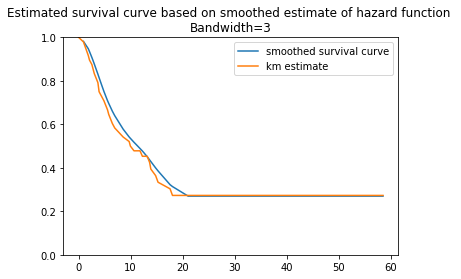

In [60]:
fig, ax = plt.subplots()
ax.plot(
    df_surv_smoothed["time"],
    df_surv_smoothed["surv_smoothed"],
    label="smoothed survival curve",
)
ax.plot(
    km2.survival_function_.reset_index()["timeline"],
    km2.survival_function_.reset_index()["gastricXelox data"],
    label="km estimate",
)
ax.set_ylim((0, 1))
ax.set_title(
    f"Estimated survival curve based on smoothed estimate of hazard function \nBandwidth={bandwidth}"  # noqa
)
ax.legend()
fig.show()

### Trying several different bandwidths in a loop:

In [61]:
def surv_smoothed(times: pd.Series, hazards: pd.Series) -> pd.DataFrame:
    times_diff = diff_and_drop_initial_na(times)
    hazards = hazards[0:-1]
    surv_smoothed = surv_from_hazard(hazards, times_diff)
    df_surv_smoothed = pd.DataFrame(
        {
            "time": np.cumsum(times_diff),
            "surv_smoothed": surv_smoothed,
        }
    )
    return df_surv_smoothed

In [62]:
def surv_from_hazard(hazards, times_diff):
    return np.exp(-np.cumsum(hazards * times_diff))

In [63]:
def test_surv_from_hazard():
    # todo: finish this
    pass

In [64]:
def diff_and_drop_initial_na(times: pd.Series):
    t_diff = times.diff()
    t_diff = t_diff[1:].reset_index(drop=True)
    return t_diff

In [65]:
def test_drop_na_after_diff():
    times = pd.Series([i for i in range(1, 11)])
    t_diff = diff_and_drop_initial_na(times)
    assert len(t_diff) == len(times) - 1
    assert all(t_diff.notnull())

(0.0, 1.0)

Text(0.5, 1.0, 'Estimated survival curve based on smoothed estimate of hazard function \nBandwidth=0.1')

(0.0, 1.0)

Text(0.5, 1.0, 'Estimated survival curve based on smoothed estimate of hazard function \nBandwidth=1')

(0.0, 1.0)

Text(0.5, 1.0, 'Estimated survival curve based on smoothed estimate of hazard function \nBandwidth=2')

(0.0, 1.0)

Text(0.5, 1.0, 'Estimated survival curve based on smoothed estimate of hazard function \nBandwidth=3')

(0.0, 1.0)

Text(0.5, 1.0, 'Estimated survival curve based on smoothed estimate of hazard function \nBandwidth=5')

(0.0, 1.0)

Text(0.5, 1.0, 'Estimated survival curve based on smoothed estimate of hazard function \nBandwidth=10')

c:\Nayef\survival-analysis-notes\.venv\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


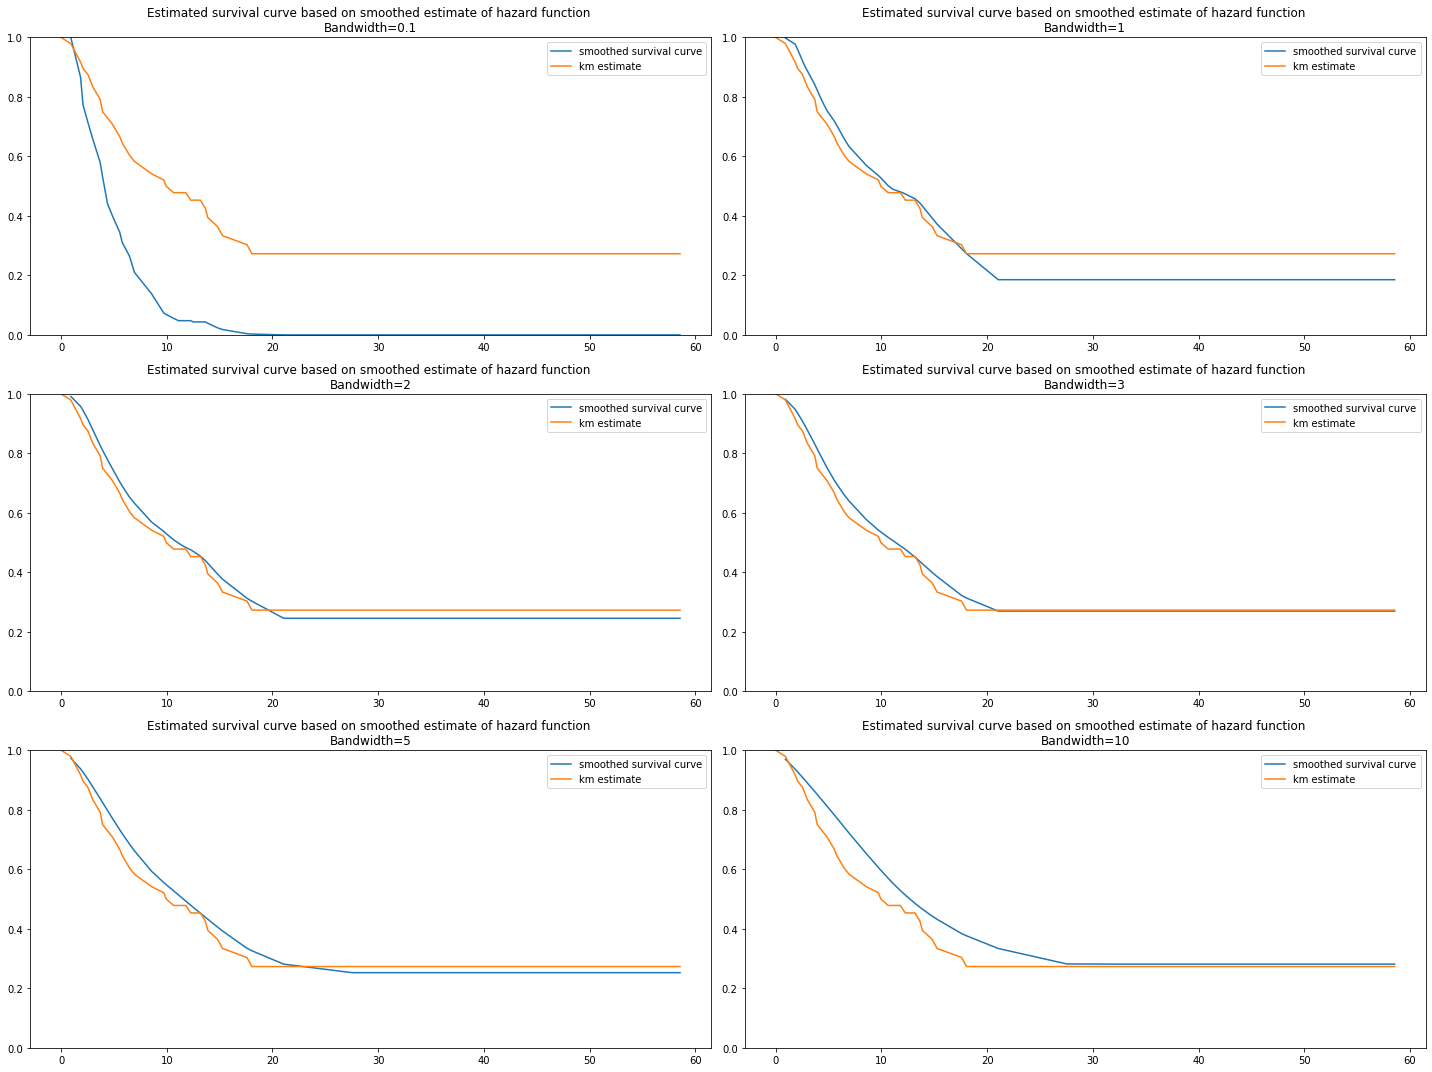

In [66]:
fig = plt.figure(figsize=(20, 15))
for n, bandwidth in enumerate([0.1, 1, 2, 3, 5, 10]):
    df_smoothed_hazard = (
        na1.smoothed_hazard_(bandwidth=bandwidth)
            .reset_index()
            .rename(
            columns={"index": "time", "differenced-NA_estimate": "hazard_estimate"}
        )  # noqa
    )
    df_surv_smoothed = surv_smoothed(df_smoothed_hazard['time'] ,
                                     df_smoothed_hazard['hazard_estimate'])
    ax = plt.subplot(3, 2, n + 1)
    ax.plot(
        df_surv_smoothed["time"],
        df_surv_smoothed["surv_smoothed"],
        label="smoothed survival curve",
    )
    ax.plot(
        km2.survival_function_.reset_index()["timeline"],
        km2.survival_function_.reset_index()["gastricXelox data"],
        label="km estimate",
    )
    ax.set_ylim((0, 1))
    ax.set_title(
        f"Estimated survival curve based on smoothed estimate of hazard function \nBandwidth={bandwidth}"  # noqa
    )
    ax.legend()
fig.tight_layout()
fig.show()